In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Read the data

In [2]:
df_man = pd.read_parquet(r"..\data\final_processed\Brooklyn - all.parquet.gz")
df_man = df_man.set_index("timestamp_hour")
df_man['txn_date'] = pd.to_datetime(df_man['txn_date'])
df_man = df_man[
    (df_man['txn_date'] >= '2019-02-01') & (df_man['txn_date'] <= '2024-12-31')
]
df_man['txn_month'] = df_man['txn_date'].apply(lambda x: pd.Timestamp(year=x.year, month=x.month, day=1))
print(df_man.shape)
df_man.head()

(48936, 17)


,txn_date,txn_hour,num_txns_Yellow Taxi Trip Records,num_txns_For-Hire Vehicle Trip Records,num_txns_Green Taxi Trip Records,num_txns_Uber,num_txns_Lyft,num_txns_Juno,num_txns_Via,total_amount_Yellow Taxi Trip Records,total_amount_For-Hire Vehicle Trip Records,total_amount_Green Taxi Trip Records,total_amount_Uber,total_amount_Lyft,total_amount_Juno,total_amount_Via,txn_month
timestamp_hour,,,,,,,,,,,,,,,,,
2019-02-01 00:00:00,2019-02-01,0,134,14,114,4630,2138,466,0,1824.341667,0.0,1928.28,0.0,0.0,0.0,0.0,2019-02-01
2019-02-01 01:00:00,2019-02-01,1,69,10,80,2712,1289,284,0,937.033333,0.0,1228.79,0.0,0.0,0.0,0.0,2019-02-01
2019-02-01 02:00:00,2019-02-01,2,34,8,39,1801,823,180,0,525.040000,0.0,650.49,0.0,0.0,0.0,0.0,2019-02-01
2019-02-01 03:00:00,2019-02-01,3,33,9,33,1537,674,144,0,677.090000,0.0,684.37,0.0,0.0,0.0,0.0,2019-02-01
2019-02-01 04:00:00,2019-02-01,4,64,25,39,1695,803,153,0,1152.805000,0.0,703.81,0.0,0.0,0.0,0.0,2019-02-01


In [9]:
df.columns

NameError: name 'df' is not defined

### Check if all dates and hours are available

In [3]:
grouped = df_man.groupby('txn_date')['txn_hour'].nunique()
grouped[grouped < 24]

Series([], Name: txn_hour, dtype: int64)

# Time Series EDA

### Hourly trend

<Axes: xlabel='timestamp_hour'>

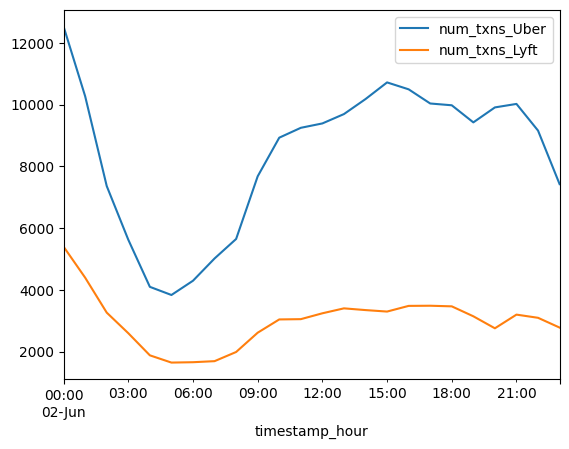

In [6]:
uber_hly_txns = (
    df_man[(df_man['txn_date'] >= '2024-06-02') & (df_man['txn_date'] <= '2024-06-02')]
    [["num_txns_Uber", "num_txns_Lyft"]]
    .groupby("timestamp_hour")
    .sum()
)
uber_hly_txns.plot()

<Axes: xlabel='timestamp_hour'>

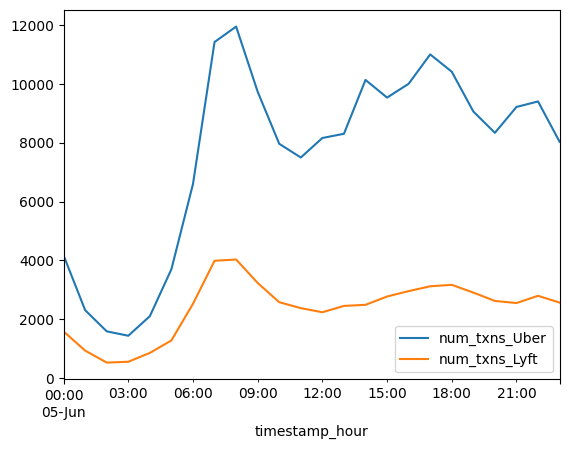

In [7]:
uber_hly_txns_1d = (
    df_man[(df_man['txn_date'] == '2024-06-05')]
    [["num_txns_Uber", "num_txns_Lyft"]]
    .groupby("timestamp_hour")
    .sum()
)
uber_hly_txns_1d.plot()

### Daily trend

<Axes: xlabel='txn_date'>

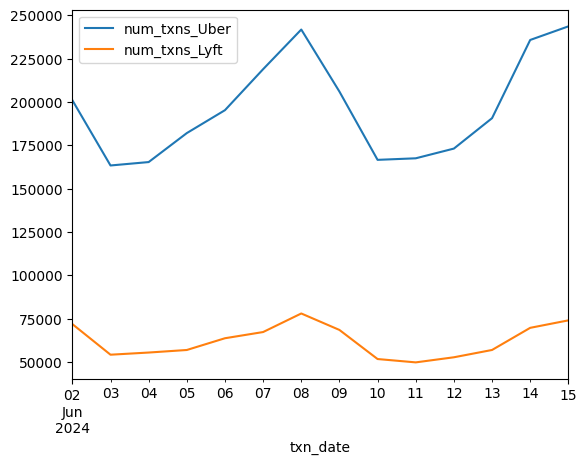

In [8]:
uber_dly_txns = (
    df_man[(df_man['txn_date'] >= '2024-06-02') & (df_man['txn_date'] <= '2024-06-15')]
    [["txn_date", "num_txns_Uber", 
      "num_txns_Lyft"]]
    .groupby("txn_date")
    .sum()
)
uber_dly_txns.plot()

### Monthly trends

In [ ]:
uber_mly_txns = (
    df_man[["txn_month", "num_txns_Uber", "num_txns_Lyft"]]
    .groupby("txn_month")
    .sum()
)
uber_mly_txns.plot()

### ACF and PACF plots

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Time series data
time_series = df_man["num_txns_Uber"]

# Max time lag 
lag = 700

# Tick positions
tick_positions = np.arange(0, lag + 1, 24)  # From 0 to max(x) in steps of 24
tick_labels = [int(t) for t in tick_positions]  # Custom labels

# Plot ACF and PACF
fig, ax = plt.subplots(2, 1, figsize=(15, 7))

# Autocorrelation (ACF)
plot_acf(
    time_series,
    ax=ax[0],
    lags=lag,
    vlines_kwargs={"linewidth": 0.5},  # Adjust line width
    markersize=3  # Adjust marker size
)
ax[0].set_title("ACF")
ax[0].set_xlabel("Hours")
ax[0].set_xticks(tick_positions)  # Set tick positions
ax[0].set_xticklabels(tick_labels)  # Set custom labels
ax[0].grid(True, which='both', linestyle='--', linewidth=0.5)  # Add grid

# Partial Autocorrelation (PACF)
plot_pacf(
    time_series,
    ax=ax[1],
    lags=lag,
    method='ywm',
    vlines_kwargs={"linewidth": 0.5},  # Adjust line width
    markersize=3  # Adjust marker size
)
ax[1].set_title("PACF")
ax[1].set_xlabel("Hours")
ax[1].set_xticks(tick_positions)  # Set tick positions
ax[1].set_xticklabels(tick_labels)  # Set custom labels
ax[1].grid(True, which='both', linestyle='--', linewidth=0.5)  # Add grid

fig.tight_layout()
plt.savefig("../data/images/acf_pacf_manhattan.jpeg", dpi=300)
plt.show()

# Test of stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller

time_series = df_man[(df_man['txn_date'] >= '2022-01-01') & (df_man['txn_date'] <= '2024-01-01')]["num_txns_Uber"].to_numpy()
result = adfuller(time_series)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

Time series is stationary.

# Fourier Transform to determine the most dominant frequencies

In [ ]:
def analyze_frequency(time_series, sampling_rate):
    """
    Analyze frequency components of a time series
    
    Parameters:
    - time_series: numpy array of time series data
    - sampling_rate: sampling frequency in Hz
    
    Returns:
    - Dominant frequencies and their magnitudes
    """
    # Perform Fast Fourier Transform
    fft_result = np.fft.fft(time_series)
    frequencies = np.fft.fftfreq(len(time_series), 1/sampling_rate)
    
    # Get positive frequencies
    positive_freq_mask = frequencies >= 0
    positive_frequencies = frequencies[positive_freq_mask]
    positive_magnitudes = np.abs(fft_result[positive_freq_mask])
    
    # Find top 3 dominant frequencies
    top_indices = np.argsort(positive_magnitudes)[::-1][:40]
    dominant_frequencies = positive_frequencies[top_indices]
    dominant_magnitudes = positive_magnitudes[top_indices]
    
    # Plotting
    plt.figure(figsize=(12, 6))
    
    # Original Time Series
    plt.subplot(2, 1, 1)
    plt.plot(time_series)
    plt.title('Original Time Series')
    plt.xlabel('Sample')
    plt.ylabel('Value')
    
    # Frequency Spectrum
    plt.subplot(2, 1, 2)
    plt.plot(positive_frequencies, positive_magnitudes)
    plt.title('Frequency Spectrum')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    
    plt.tight_layout()
    plt.show()
    
    # Print dominant frequencies
    # print("Dominant Frequencies:")
    # for freq, mag in zip(dominant_frequencies, dominant_magnitudes):
    #     print(f"Frequency: {freq:.20f} Hz, Magnitude: {mag:.20f}")
    
    return dominant_frequencies, dominant_magnitudes


sampling_rate = 1 #/3600  
time_series = df_man[(df_man['txn_date'] >= '2023-01-01') & (df_man['txn_date'] <= '2024-01-01')]["num_txns_Uber"].to_numpy()
dominant_frequencies, dominant_magnitudes = analyze_frequency(time_series, sampling_rate)

In [ ]:
period_hours = sorted(1 / (dominant_frequencies)  )
period_hours

### Time Series Decomposition

Might be difficult to do since the data has daily and weekly seasonality.

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# STL decomposition
result = seasonal_decompose(time_series, model='additive', period=24)  

# Plot the decomposition
result.plot()
plt.show()

### Geopandas plots (Heatmaps)